# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [1]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [2]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

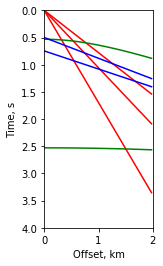

In [3]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

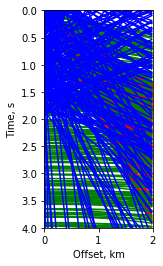

In [4]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [5]:
events2

[[0, 0.8717895710736099, 0, 'D'],
 [0, 0.6424615428218171, 0, 'D'],
 [0, 0.9802563492102808, 0, 'D'],
 [0, 1.3765968624641074, 0, 'D'],
 [0, 1.0145045190618953, 0, 'D'],
 [0, 0.7867544801814377, 0, 'D'],
 [0, 0.7431870978099413, 0, 'D'],
 [0, 1.4595202912618772, 0, 'D'],
 [0, 1.444395891964907, 0, 'D'],
 [0, 0.7049661442689364, 0, 'D'],
 [0, 1.3808590707660209, 0, 'D'],
 [0, 1.0863440238157573, 0, 'D'],
 [0, 0.7352741130123778, 0, 'D'],
 [0, 0.5029345314081954, 0, 'D'],
 [0, 0.7739654792547217, 0, 'D'],
 [0, 0.5097884697471734, 0, 'D'],
 [0, 0.8101866893163333, 0, 'D'],
 [0, 1.196844408773625, 0, 'D'],
 [0, 0.6987836902977324, 0, 'D'],
 [0, 0.6784286293422797, 0, 'D'],
 [0, 0.5079021558203236, 0, 'D'],
 [0, 0.800576449909142, 0, 'D'],
 [0, 1.3495582591153428, 0, 'D'],
 [0, 1.4698726437045397, 0, 'D'],
 [0, 0.9998457844031645, 0, 'D'],
 [0, 1.4097742848562125, 0, 'D'],
 [0, 0.6539127652091778, 0, 'D'],
 [0, 0.9317164628496971, 0, 'D'],
 [0, 0.6281334129574633, 0, 'D'],
 [0, 1.4467811829

In [6]:
events

[[0, 0.5886957457783951, 0, 'D'],
 [0, 0.946300068553052, 0, 'D'],
 [0, 1.2832333538780922, 0, 'D'],
 [0.5319330096638919, 2.8081006247858395, 1, 'R'],
 [2.5289343082316496, 4.59742475074224, 1, 'R'],
 [0.7461054720755267, 2.999086798733571, 0, 'N'],
 [0.4991211509890392, 2.6125425015127615, 0, 'N'],
 [-1.791952309205732, 2.782075004947499, 0, 'N']]

In [7]:
events[0]

[0, 0.5886957457783951, 0, 'D']

In [8]:
events[0][0]

0

In [9]:
def makeEventsDictOrig(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
        eventsDict['direct'].append(each[0])
        eventsDict['reflected'].append(each[1])
        eventsDict['coherentnoise'].append(each[2])
        labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)



In [10]:
def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    eventsDict['events'] = []
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
#         eventsDict['direct'].append(each[0])
#         eventsDict['reflected'].append(each[1])
#         eventsDict['coherentnoise'].append(each[2])
         eventsDict['events'].append(each[0:3])
         labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)




In [11]:
testEvents = makeEventsDict(events)
print(testEvents)

({'direct': [], 'reflected': [], 'coherentnoise': [], 'events': [[0, 0.5886957457783951, 0], [0, 0.946300068553052, 0], [0, 1.2832333538780922, 0], [0.5319330096638919, 2.8081006247858395, 1], [2.5289343082316496, 4.59742475074224, 1], [0.7461054720755267, 2.999086798733571, 0], [0.4991211509890392, 2.6125425015127615, 0], [-1.791952309205732, 2.782075004947499, 0]]}, {'label': ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']})


In [12]:
eventsDict = testEvents[0]
labelsDict = testEvents[1]

In [13]:
from sklearn import svm

In [14]:
from sklearn import svm
SVC = svm.SVC()
import matplotlib.pyplot as plt

In [119]:
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = svm.SVC()
# clf.fit(X, y)  
X = eventsDict['events']
print("X = ",X)
y = labelsDict['label']
print("y = ",y)
clf = svm.SVC()
clf.fit(X, y)

X =  [[0, 1.3479674521859382, 0], [0, 0.9825848835471969, 0], [0, 1.189699094327815, 0], [2.936385215550364, 1.894089053360448, 1], [0.5111371128019355, 3.592141267395934, 1], [1.8679158449038202, -0.6258970764171092, 0], [0.014710067993876752, 0.5888729111306192, 0], [-1.190348857444183, -0.8156719314845455, 0]]
y =  ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
clf.predict([[0,1.34,0]])

array(['D'], 
      dtype='<U1')

#### SUCCESS !! really really easy success, but at least it didn't do anything obviously wrong!

In [121]:
# get support vectors
clf.support_vectors_

array([[ 0.        ,  1.34796745,  0.        ],
       [ 0.        ,  0.98258488,  0.        ],
       [ 0.        ,  1.18969909,  0.        ],
       [ 1.86791584, -0.62589708,  0.        ],
       [ 0.01471007,  0.58887291,  0.        ],
       [-1.19034886, -0.81567193,  0.        ],
       [ 2.93638522,  1.89408905,  1.        ],
       [ 0.51113711,  3.59214127,  1.        ]])

In [122]:
# get indices of support vectors
clf.support_ 

array([0, 1, 2, 5, 6, 7, 3, 4], dtype=int32)

In [123]:
# get number of support vectors for each class
clf.n_support_ 

array([3, 3, 2], dtype=int32)

In [131]:
# This function combines several of the smaller lines above
# It takes a events list, turns it into two dictionaries combined, splits that into two arrays for X and Y
# trains a SVM label on them and then returns that model output details
# The model will need to be run on a input for a prediction

def comboFunctionA(events):
    testEvents = makeEventsDict(events)
    eventsDict = testEvents[0]
    labelsDict = testEvents[1]
    X = eventsDict['events']
#     print("X = ",X)
    y = labelsDict['label']
#     print("y = ",y)
    clf = svm.SVC()
    output = clf.fit(X, y)
    return(output)
    

In [134]:
# runs the function above and make a prediction
tempAnswer = comboFunctionA(events2)
tempAnswer

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
# requests a prediction from the model
clf.predict([[0,1.34,0]])

array(['D'], 
      dtype='<U1')